In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
%matplotlib inline
sns.set(style='whitegrid')

In [12]:
df = pd.read_csv('cardiotocographic.csv')


In [14]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [24]:
df.isnull().sum()
for col in df.columns:df[col] = pd.to_numeric(df[col], errors='coerce')

In [26]:
df.dropna(inplace=True)  

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [32]:
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [34]:
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = summary['75%'] - summary['25%']
summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2105.0,0.003202,0.004324,-0.019284,0.000000,0.001631,0.005650,0.038567,0.001631,0.005650
FM,2105.0,0.009963,0.067870,-0.480634,0.000000,0.000000,0.002554,0.961268,0.000000,0.002554
UC,2105.0,0.004388,0.003350,-0.014925,0.001838,0.004484,0.006536,0.030002,0.004484,0.004698
DL,2105.0,0.001892,0.003348,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2105.0,46.996929,18.847737,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2105.0,1.361006,1.173164,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2105.0,10.353647,21.282102,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


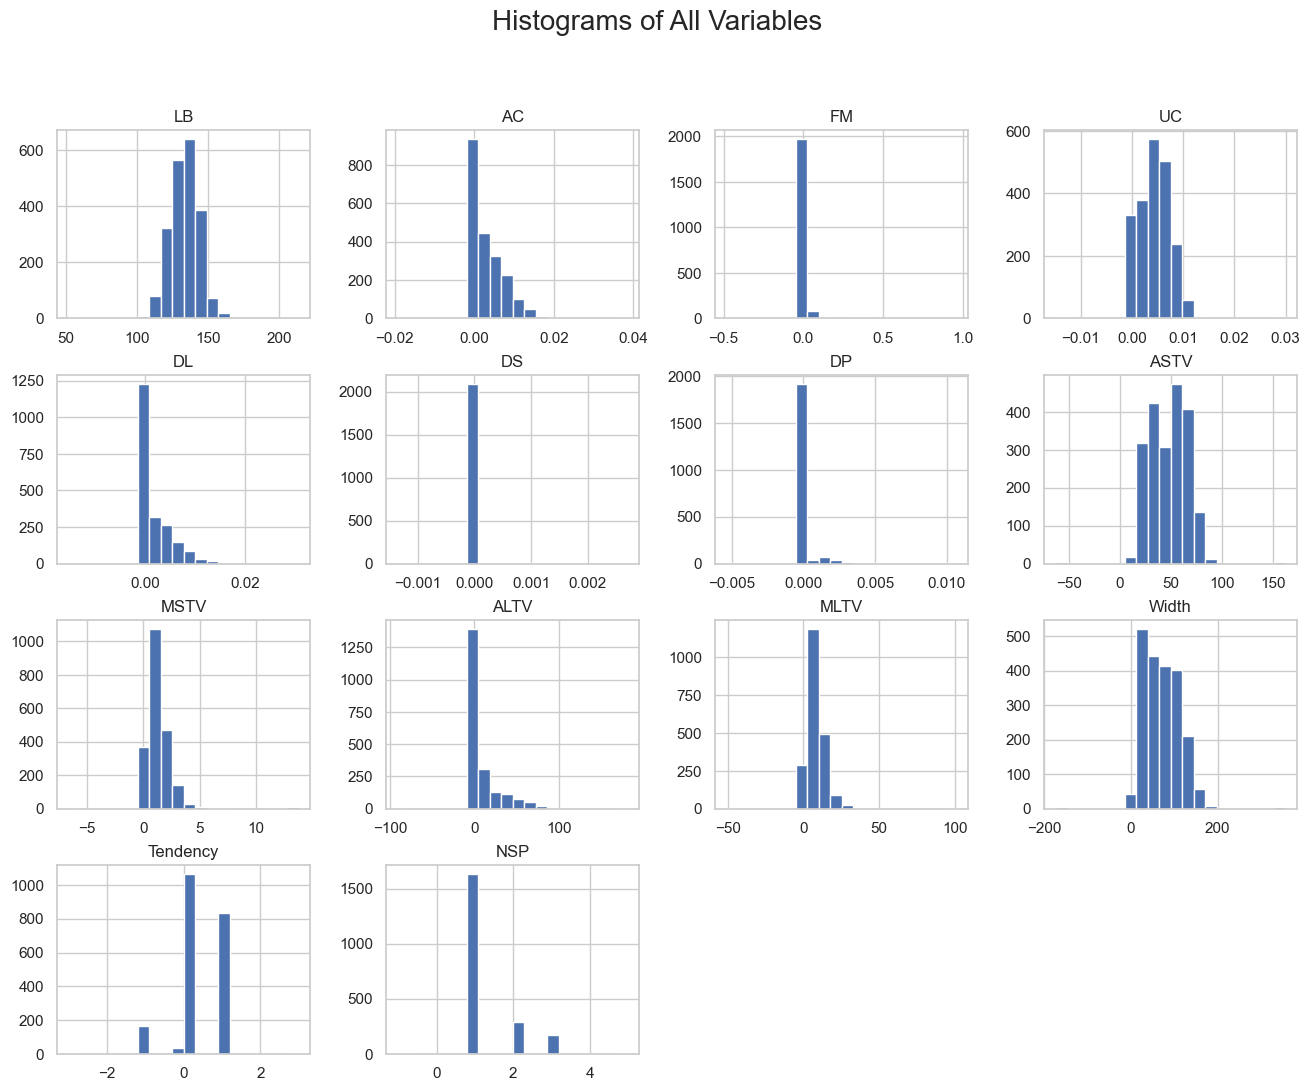

In [37]:
df.hist(bins=20, figsize=(16,12))
plt.suptitle('Histograms of All Variables', fontsize=20)
plt.show()

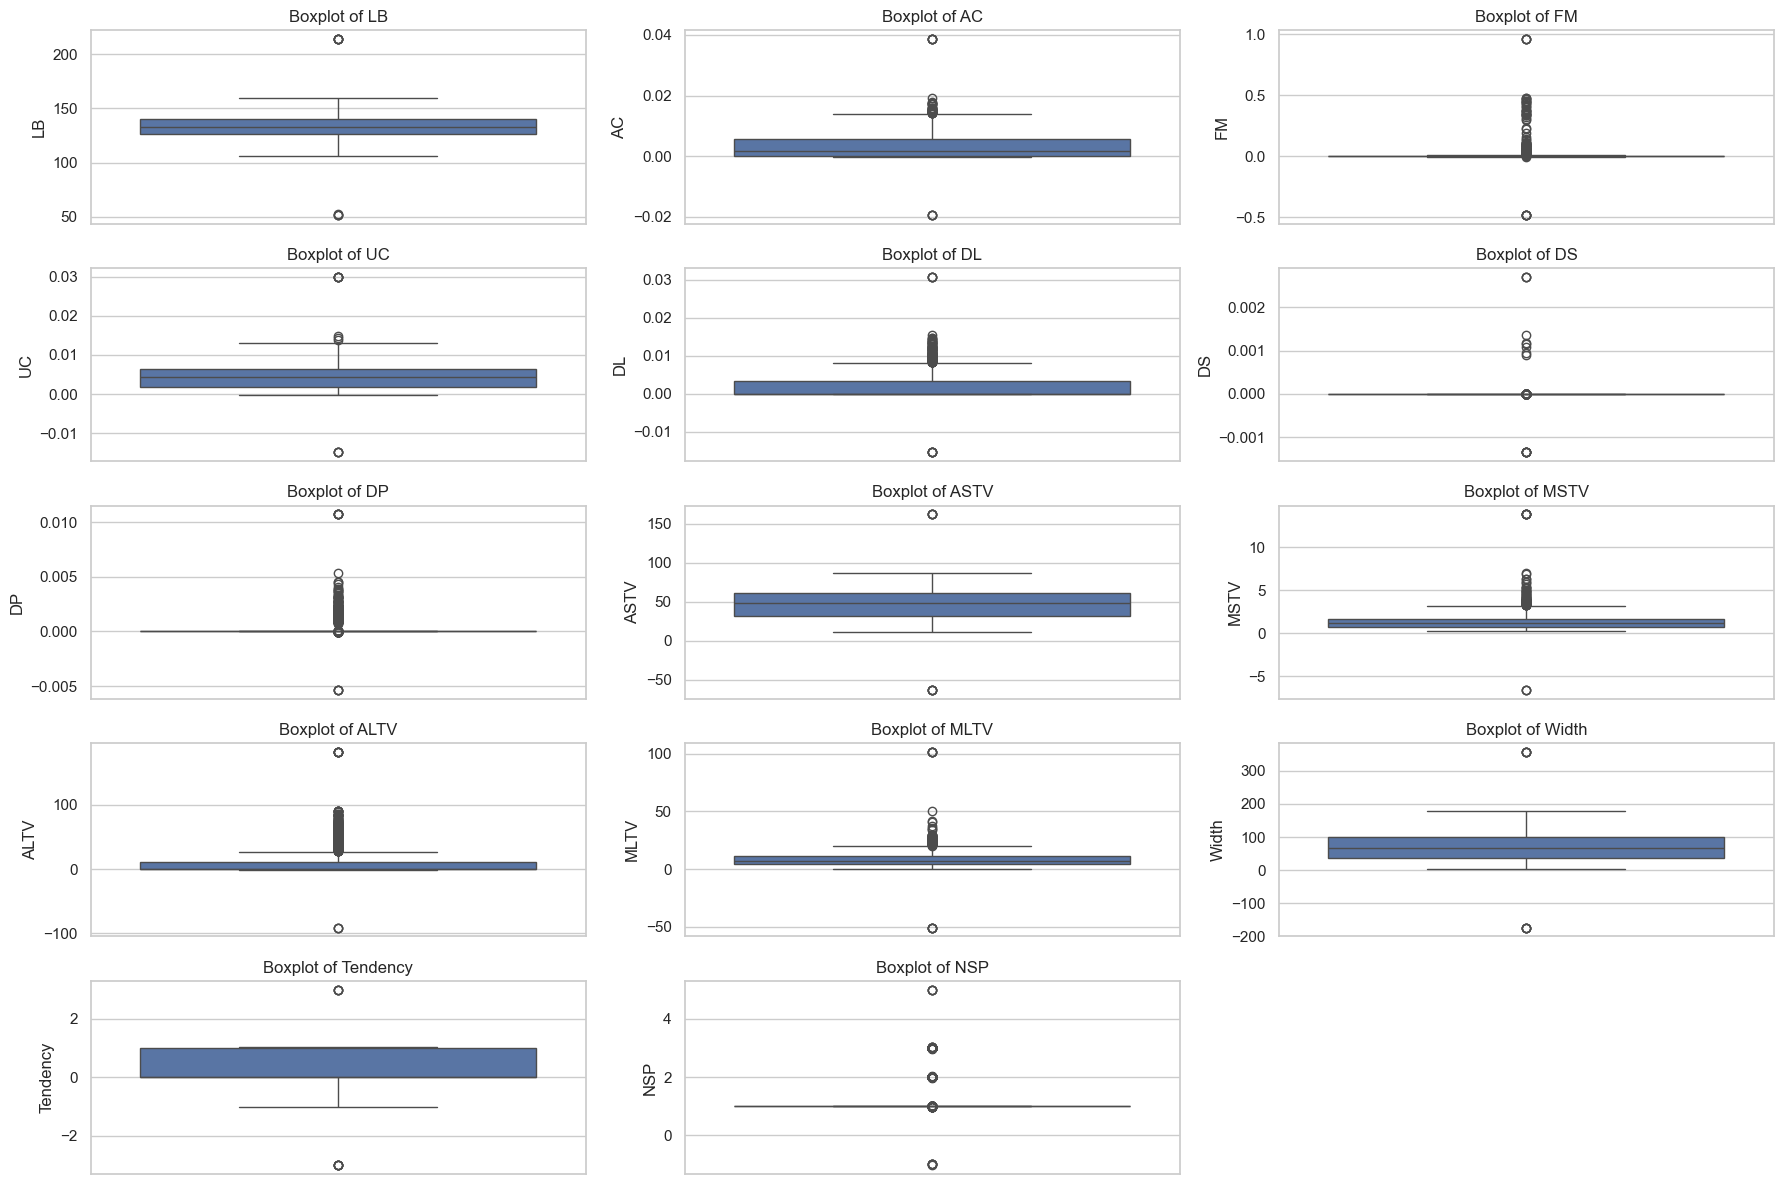

In [42]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i)  # 5 rows x 3 columns = 15 slots, enough for 13 plots
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

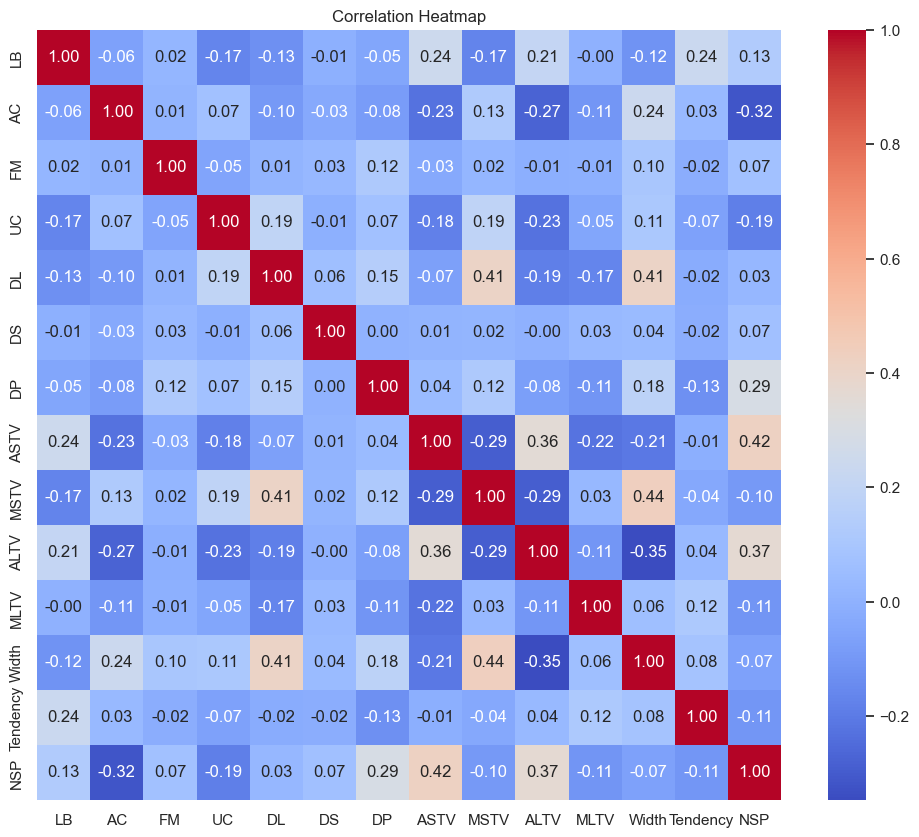

In [44]:
corr = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

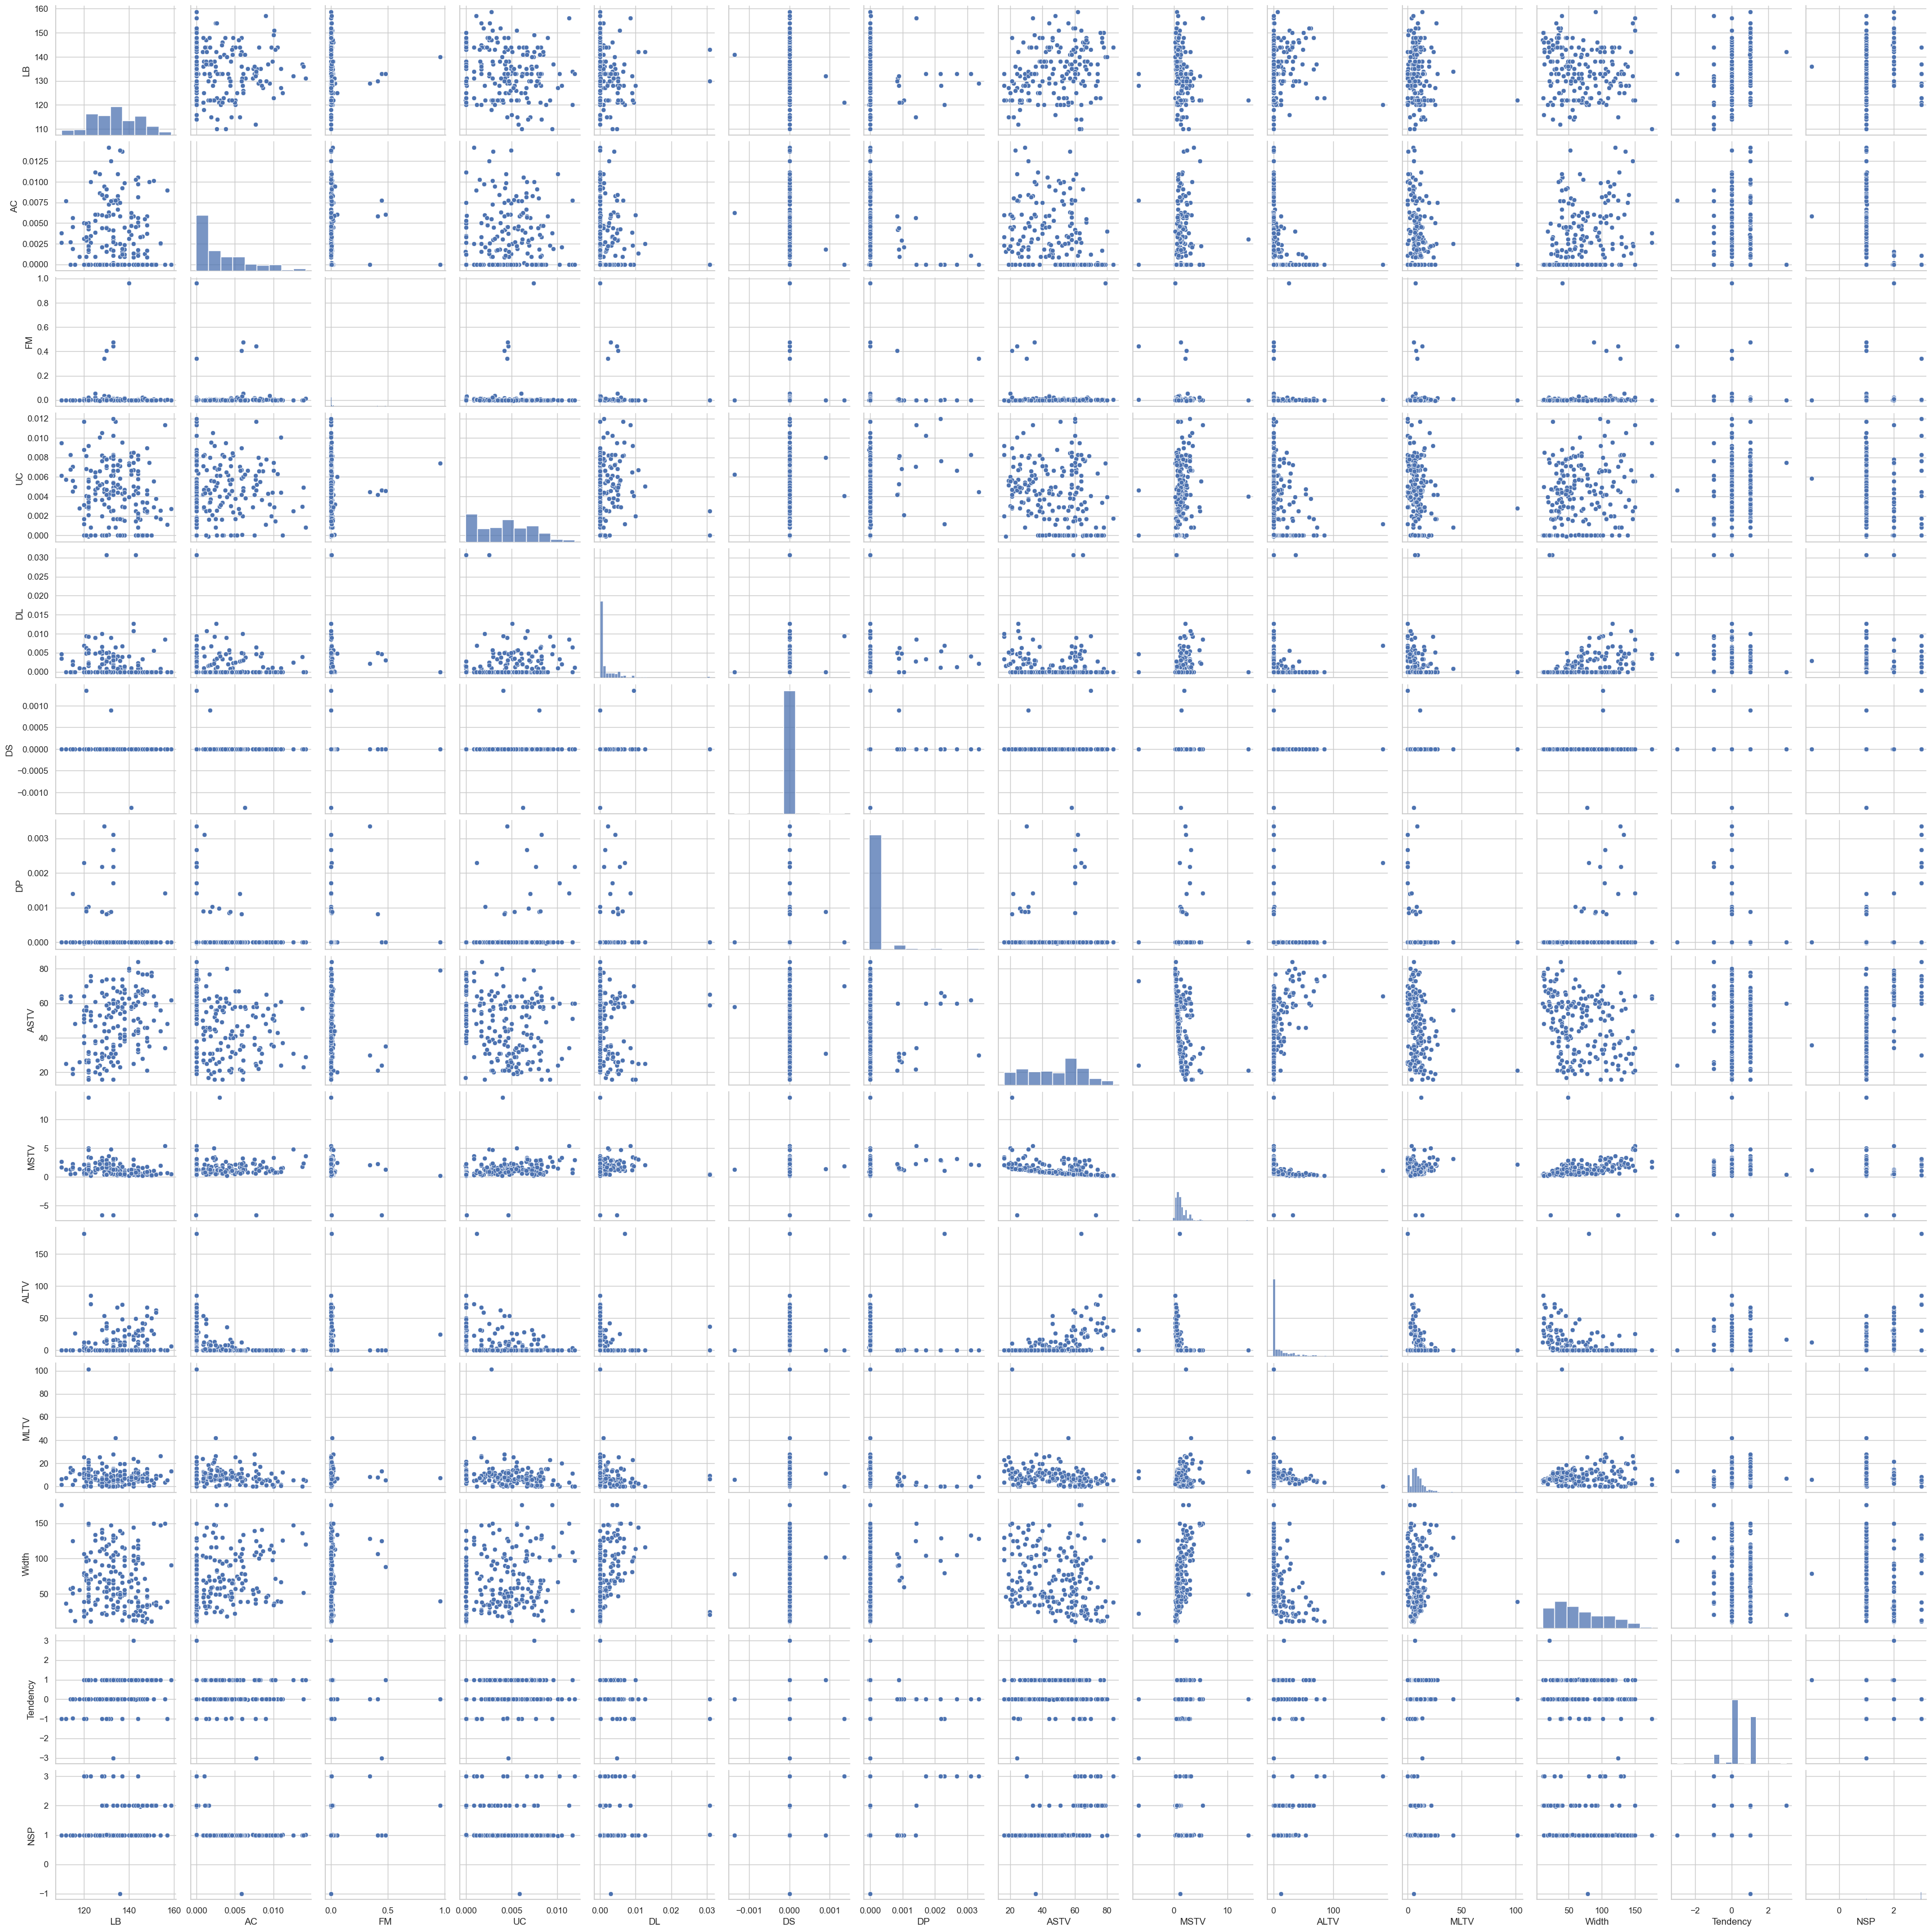

In [46]:
sns.pairplot(df.sample(200))  # Sample if dataset is large
plt.show()


In [48]:
df.corr()['LB'].sort_values(ascending=False)


LB          1.000000
ASTV        0.242625
Tendency    0.236864
ALTV        0.210728
NSP         0.131843
FM          0.018777
MLTV       -0.003457
DS         -0.005438
DP         -0.047724
AC         -0.063830
Width      -0.118425
DL         -0.126959
UC         -0.166570
MSTV       -0.170473
Name: LB, dtype: float64

In [ ]:
#conclusion:
In this exploratory data analysis of the cardiographic.csv dataset, we conducted a comprehensive examination of 11 physiological features related to fetal health, such as fetal heart rate (LB), accelerations (AC), fetal movements (FM), uterine contractions (UC), and various types of decelerations (DL, DS, DP) along with variability metrics (ASTV, MSTV, ALTV, MLTV).